# Inference

In [1]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("Theivaprakasham/layoutlmv3-finetuned-wildreceipt")

c:\Users\User\anaconda3\envs\dl\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [41]:
# Save the model
model.save_pretrained('models/saved_model')

In [43]:
from transformers import AutoModelForTokenClassification, AutoTokenizer



# Reload the model
reloaded_model = AutoModelForTokenClassification.from_pretrained('models/saved_model')

In [2]:
from datasets import load_dataset 

dataset = load_dataset("Theivaprakasham/wildreceipt")

In [45]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image_path"
text_column_name = "words"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

In [46]:

# In the event the labels are not a `Sequence[ClassLabel]`, we will need to go through the dataset to get the
# unique labels.
def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [47]:
# print(id2label)

In [48]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

In [49]:
import torch

In [50]:
from PIL import Image

In [ ]:
import os

image_path = example["image_path"]
image_ext = os.path.splitext(image_path)[1]

In [66]:
import os

In [89]:
example = dataset["test"][100]
print(example.keys())

image = Image.open(example["image_path"])
image_path = example["image_path"]
image_ext = os.path.splitext(image_path)[1]
print(image_ext)

dict_keys(['id', 'words', 'bboxes', 'ner_tags', 'image_path'])
.jpeg


In [90]:

# image2 = Image.open('..\Data\All_bills\image7-1.png')
print(image.size)
# print(image2.size)

(1529, 2048)


In [91]:

words = example["words"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

input_ids torch.Size([1, 194])
attention_mask torch.Size([1, 194])
bbox torch.Size([1, 194, 4])
labels torch.Size([1, 194])
pixel_values torch.Size([1, 3, 224, 224])


In [92]:
with torch.no_grad():
  outputs = model(**encoding)

logits = outputs.logits
print(logits.shape)

predictions = logits.argmax(-1).squeeze().tolist()
print(predictions)

torch.Size([1, 194, 26])
[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 10, 10, 9, 9, 9, 25, 25, 25, 25, 25, 24, 23, 23, 23, 23, 22, 22, 22, 22, 18, 18, 18, 24, 20, 20, 20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 25, 25, 25, 25, 13, 11, 11, 11, 11, 13, 11, 11, 11, 11, 25, 25, 13, 11, 11, 11, 11, 11, 11, 11, 11, 25, 25, 25, 13, 11, 11, 11, 11, 11, 11, 25, 25, 25, 13, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 25, 25, 25, 19, 19, 19, 19, 17, 17, 17, 17, 19, 19, 19, 19, 19, 19, 19, 19, 15, 15, 15, 15, 25, 15, 25, 25, 25, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 25]


In [93]:
labels = encoding.labels.squeeze().tolist()
print(labels)

[-100, 25, -100, -100, -100, -100, 25, -100, -100, -100, -100, -100, -100, -100, 25, -100, -100, -100, -100, -100, 25, -100, -100, 10, -100, 9, -100, -100, 25, -100, -100, -100, -100, 24, 23, -100, -100, -100, 22, -100, -100, -100, 18, -100, -100, -100, 20, -100, -100, -100, -100, 20, -100, -100, -100, 25, -100, -100, -100, -100, -100, -100, 13, 11, -100, -100, -100, 13, 11, -100, -100, -100, 25, -100, 13, 11, -100, -100, -100, -100, -100, -100, -100, 25, -100, -100, 13, 11, -100, -100, -100, -100, -100, 25, -100, -100, 13, 11, -100, -100, -100, -100, -100, -100, 13, 11, -100, -100, -100, -100, -100, 25, -100, -100, 21, -100, -100, -100, 17, -100, -100, -100, 19, -100, -100, -100, 19, -100, -100, -100, 17, -100, -100, -100, 25, -100, -100, -100, -100, 25, -100, -100, -100, 15, -100, -100, -100, 15, -100, -100, -100, 15, -100, -100, -100, 15, -100, -100, -100, 15, -100, -100, -100, 15, -100, -100, -100, 25, -100, -100, 25, -100, -100, -100, -100, -100, -100, -100, 25, -100, 1, -100, -10

In [94]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

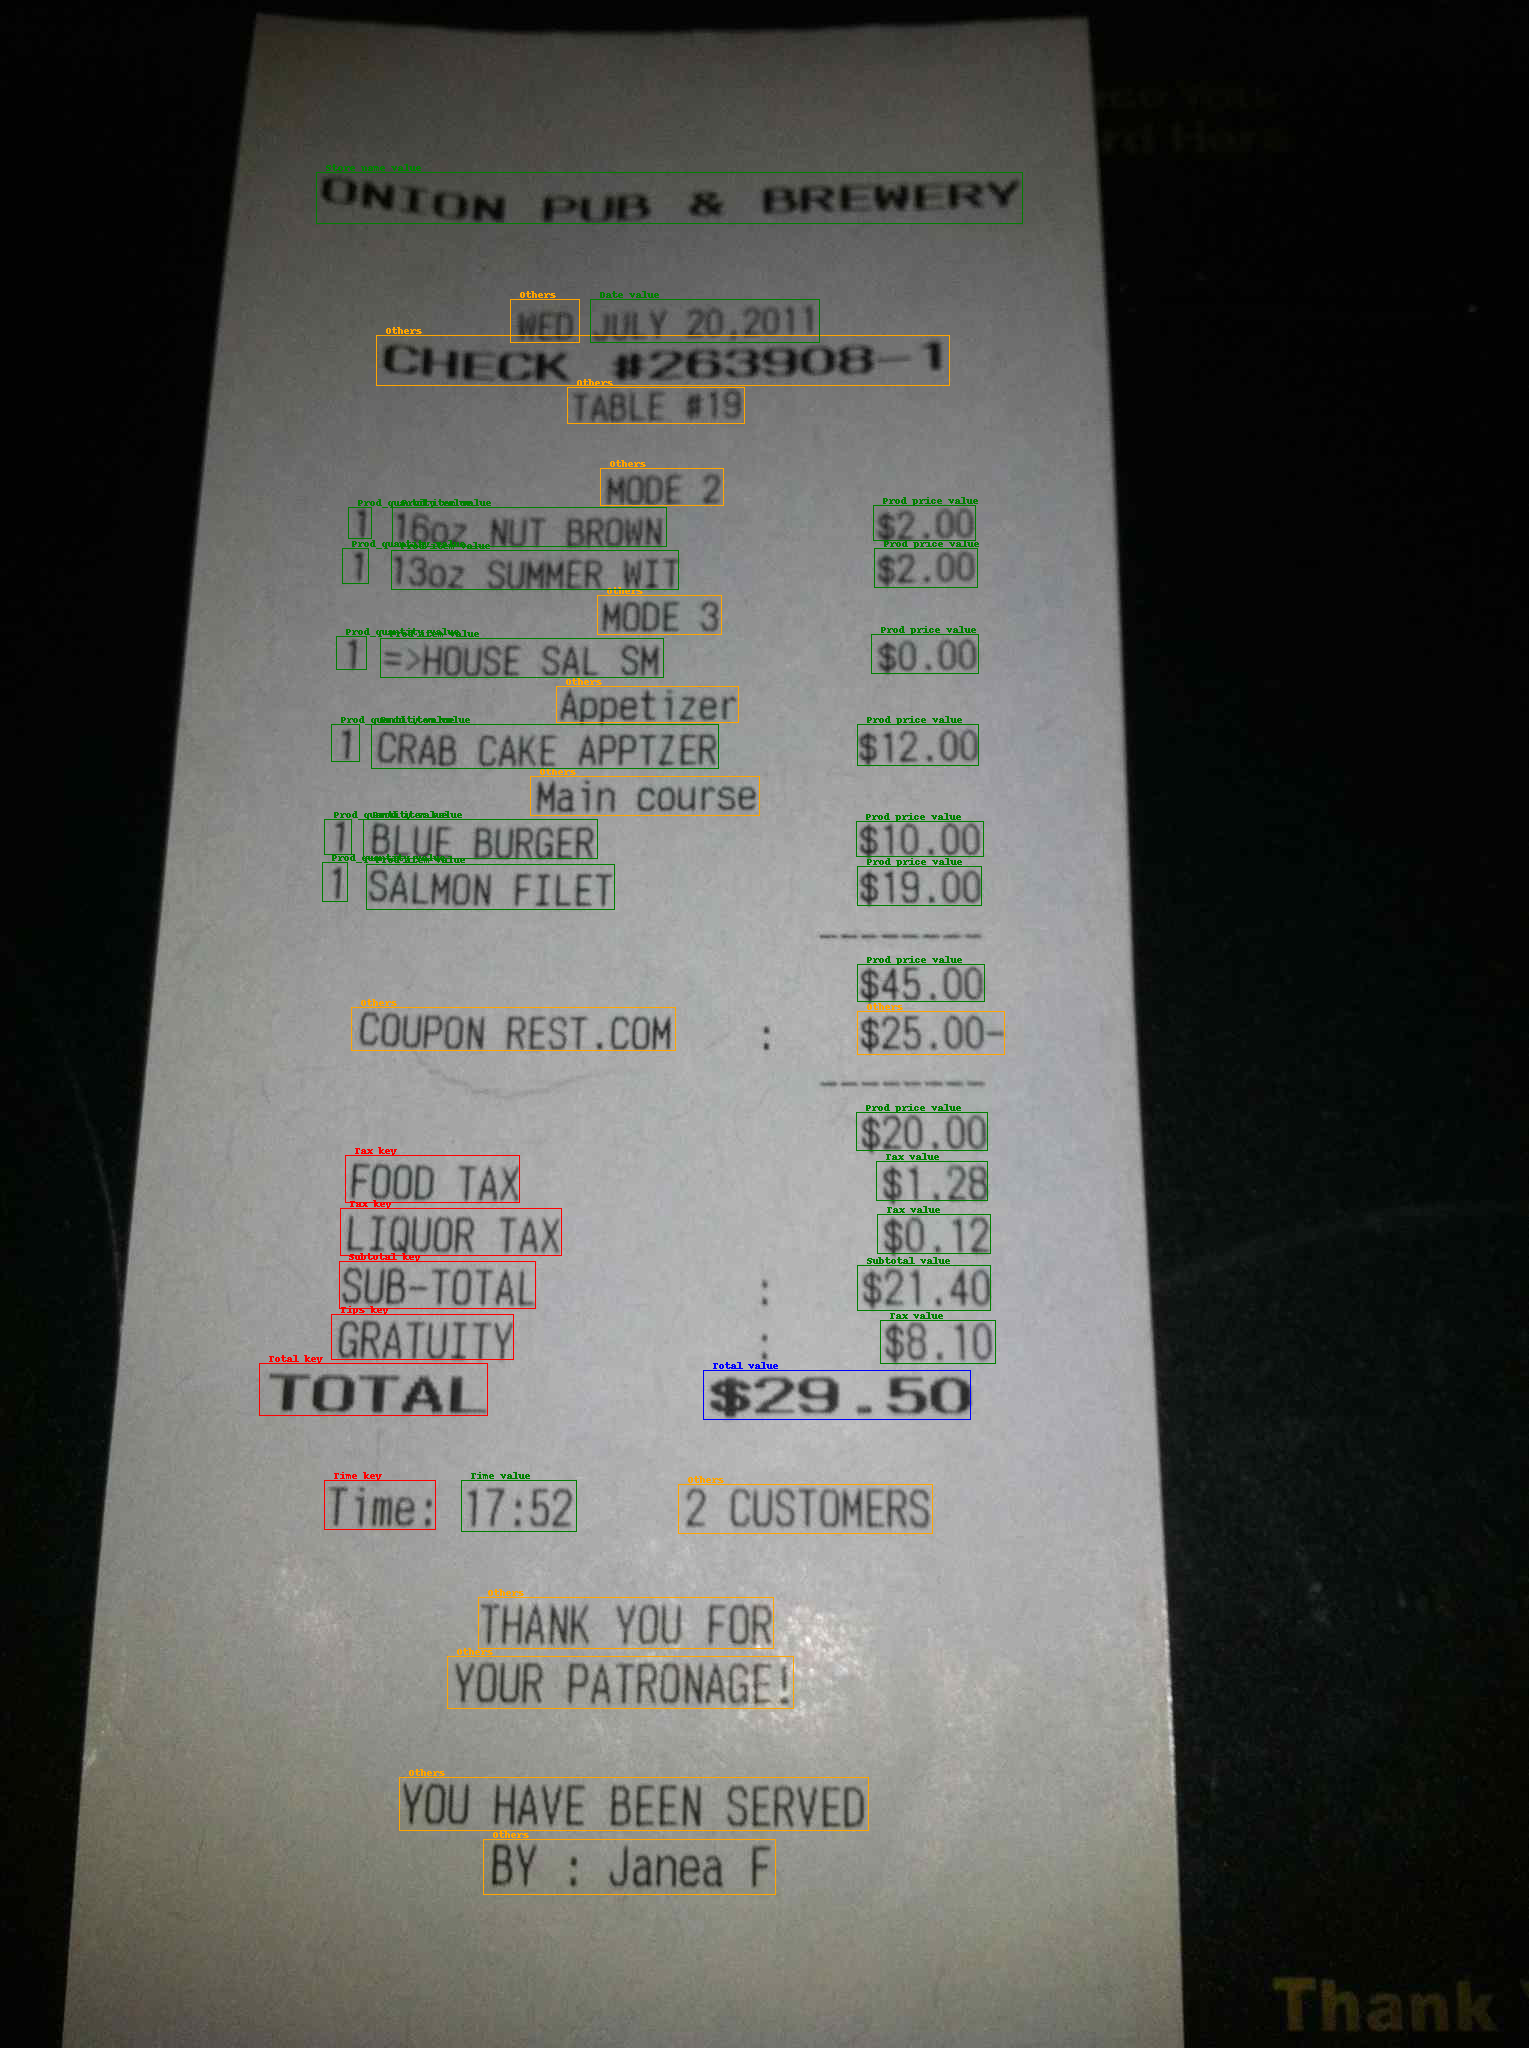

In [95]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    #label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {
    "Date_key": 'red',
    "Date_value": 'green',
    "Ignore": 'orange',
    "Others": 'orange',
    "Prod_item_key": 'red',
    "Prod_item_value": 'green',
    "Prod_price_key": 'red',
    "Prod_price_value": 'green',
    "Prod_quantity_key": 'red',
    "Prod_quantity_value": 'green',
    "Store_addr_key": 'red',
    "Store_addr_value": 'green',
    "Store_name_key": 'red',
    "Store_name_value": 'green',
    "Subtotal_key": 'red',
    "Subtotal_value": 'green',
    "Tax_key": 'red',
    "Tax_value": 'green',
    "Tel_key": 'red',
    "Tel_value": 'green',
    "Time_key": 'red',
    "Time_value": 'green',
    "Tips_key": 'red',
    "Tips_value": 'green',
    "Total_key": 'red',
    "Total_value": 'blue'
  }


for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction)
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

In [126]:
image = Image.open("../Data/Supermarket_bills/example4.jpeg").convert("RGB")


In [124]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("../Data/Supermarket_bills/example4.jpeg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphological opening
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Apply segmentation
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(opening)
for i in range(len(contours)):
    cv2.drawContours(mask, contours, i, 255, -1)

# Apply masking
result = cv2.bitwise_and(image, image, mask=mask)

# Find the bounding box of the masked region
x, y, w, h = cv2.boundingRect(mask)

# Crop the image
crop = result[y:y+h, x:x+w]

# Find the contours of the cropped image
crop_gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
_, crop_thresh = cv2.threshold(crop_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
crop_contours, _ = cv2.findContours(crop_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box of the largest contour
largest_contour = max(crop_contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image again
result = crop[y:y+h, x:x+w]

# Display the result
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

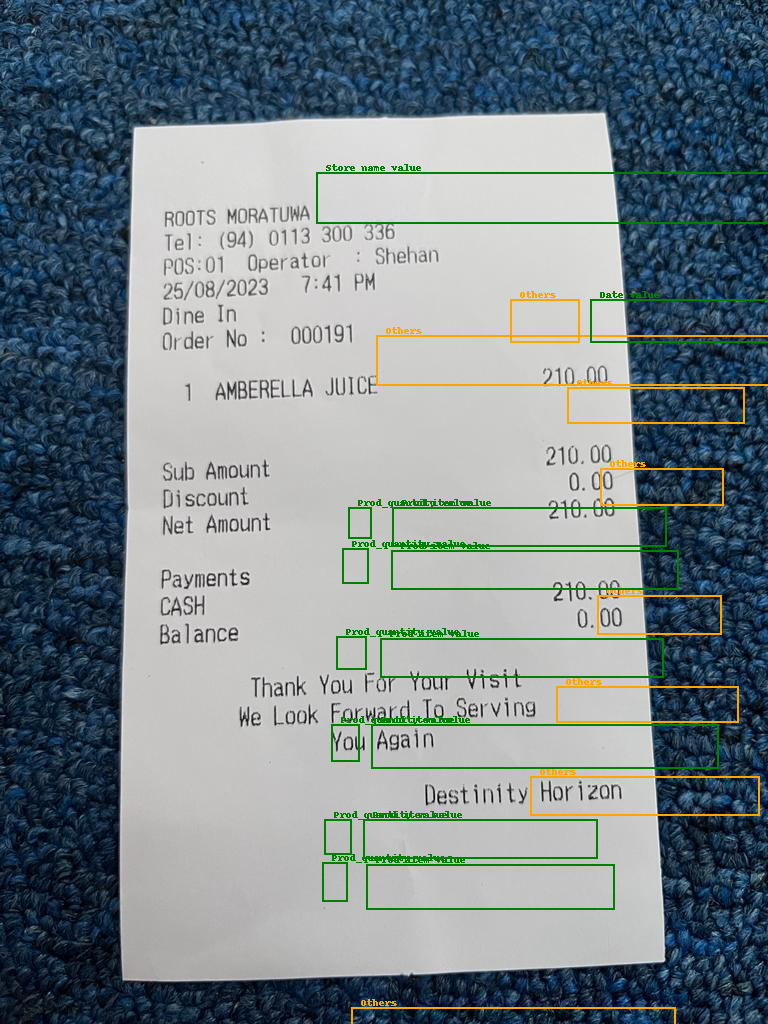

In [127]:

draw = ImageDraw.Draw(image)

for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
  actual_label = iob_to_label(id2label[label])
  box = unnormalize_box(box, width, height)
  draw.rectangle(box, outline=label2color[actual_label], width=2)
  draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color[actual_label], font=font)

image


In [128]:
bounding_boxes = {}

for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
    actual_label = iob_to_label(id2label[label])
    box = unnormalize_box(box, width, height)
    bounding_boxes[word] = box

In [129]:
bounding_boxes

{'BY:JaneaF': [483.164, 1839.104, 775.203, 1894.4],
 'YOUHAVEBEENSERVED': [399.069, 1777.664, 868.4719999999999, 1830.912],
 'YOURPATRONAGE!': [447.99699999999996, 1656.832, 793.551, 1708.032],
 'THANKYOUFOR': [478.577, 1597.44, 773.674, 1648.64],
 'Time:': [324.14799999999997, 1480.704, 435.765, 1529.856],
 '17:52': [461.758, 1480.704, 576.433, 1531.904],
 '2CUSTOMERS': [678.876, 1484.8, 932.6899999999999, 1533.952],
 'TOTAL': [259.93, 1363.968, 487.75100000000003, 1415.168],
 '$29.50': [703.34, 1370.112, 970.915, 1419.264],
 'GRATUITY': [331.793, 1314.816, 513.744, 1359.872],
 'SUB-TOTAL': [339.438, 1261.568, 535.15, 1308.672],
 'LIQUORTAX': [340.967, 1208.32, 561.143, 1255.424],
 'FOODTAX': [345.55400000000003, 1155.072, 519.86, 1202.176],
 'COUPONREST.COM': [351.67, 1007.616, 675.818, 1050.624],
 '1': [348.612, 507.904, 371.54699999999997, 538.624],
 'SALMONFILET': [366.96, 864.256, 614.658, 909.312],
 'BLUEBURGER': [363.902, 819.2, 597.839, 858.112],
 'Maincourse': [530.563, 776.1

In [109]:
bounding_boxes = {}

for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
    actual_label = iob_to_label(id2label[label])
    box = unnormalize_box(box, width, height)
    if actual_label not in bounding_boxes:
        bounding_boxes[actual_label] = []
    bounding_boxes[actual_label].append(word)

In [100]:
# bounding_boxes

In [110]:
keys_to_extract = ['Store_name_value', 'Total_value', 'Date_value']
selected_boxes = {}

for key in keys_to_extract:
    if key in bounding_boxes:
        selected_boxes[key] = bounding_boxes[key]

In [111]:
selected_boxes

{'Store_name_value': ['ONIONPUB&BREWERY'],
 'Total_value': ['$29.50'],
 'Date_value': ['JULY20,2011']}

In [103]:
import datetime

date_str = selected_boxes['Date_value'][0].replace('FRI', '').strip()
date_obj = datetime.datetime.strptime(date_str, '%m/%d/%Y').date()
date_obj = date_obj.strftime('%Y-%m-%d')

ValueError: time data 'JULY20,2011' does not match format '%m/%d/%Y'

In [ ]:
date = date_obj
date

'2018-10-26'

In [ ]:
bill_total = selected_boxes['Total_value'][0].replace('$', '').strip()
bill_total

'6.69'

In [ ]:
store_name = ' '.join(selected_boxes['Store_name_value'])
store_name

"HATOFF'SGAS,1"